# SI Fig 2: check the affect of spatial averaging
Anna Mackie, 2022

Run the spatial averaging at 3 different resolutions: 32 x 32 km (as in the main analysis), 16 x 16 km and 8 x 8 km. Key result which we check is the relationship between longwave dynamic component of cloud feedback and the fractional change in ascent fraction with warming.

In [3]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from scipy import stats
import matplotlib.lines as mlines
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

import sys
sys.path.append('../')
import funcs


In [4]:
models = ['CM1', 'dam','ICON_LEM_CRM', 'ICON_NWP_CRM', 'MESONH', 'SAM_CRM', 'SCALE', 'UCLA-CRM',
          'UKMOi-vn11.0-CASIM', 'UKMOi-vn11.0-RA1-T', 'UKMOi-vn11.0-RA1-T-nocloud', 'WRF_COL_CRM']

m = len(models)
cols =  np.load('color_grid.npy', allow_pickle = True)
temps = ['large295', 'large300', 'large305']

# limits of vertical velocity, common across models
pl = 0.22 # pos limit
nlim= -0.07 # neg limit
bs = 0.001 # bin size

bins = np.arange(nlim, pl, bs) #creates bins
b = len(bins)
print('no of vertical velocity bins: ', b)
mnbin = [] # create array of the mid-point between bin limits for plotting
for i in range(1,b):
    mnbin = np.append(mnbin, np.mean([bins[i-1], bins[i]])*100)

no of vertical velocity bins:  291


## Test dynamic effect vs ascent fraction at different resolutions

res =  32


/home/users/arm33/RCEMIP/allMod/../funcs.py:128: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


(22,) (22,)
slope is:  0.061986684092231556  and standard error is: 0.008901196754071306
res =  16


/home/users/arm33/RCEMIP/allMod/../funcs.py:128: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


(22,) (22,)
slope is:  0.10412112724471075  and standard error is: 0.014983572470284617
res =  8


/home/users/arm33/RCEMIP/allMod/../funcs.py:128: RuntimeWarning: Mean of empty slice
  arrbin = [np.nanmean(arr[dig==i]) for i in range(1,b)]


(22,) (22,)
slope is:  0.17202821925058284  and standard error is: 0.030201515707896


/tmp/ipykernel_5185/3819922483.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.setp(axes1[1:], yticklabels = [''])


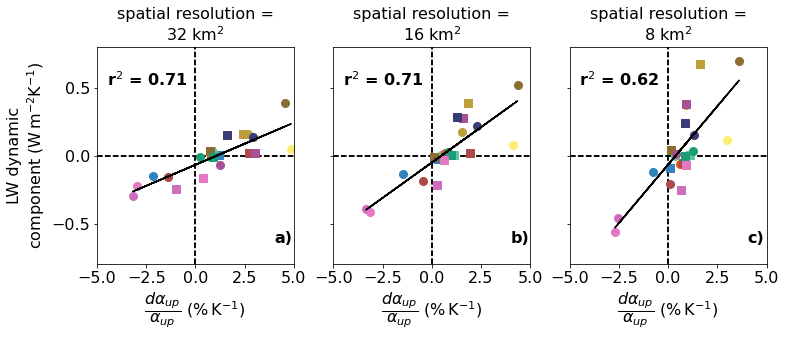

In [8]:
deltaT = 5
ms = 8
resolutions= ['32', '16', '8']
markers = ['o', 's', 'd']
fig1, axes1 = plt.subplots(1,3)
fxlim= [-5, 5]#[-7, 15]
ylim = [-0.8, 0.8]

lets = ['a)', 'b)', 'c)']
dyn_res = np.empty((3,2,m))*np.nan
res_count = 0
for resolution in resolutions:
    print('res = ', resolution)
    c = 0
    dyns, fups = [],[]
    for k in range(m):
        model = models[k]
        #print(model)
        dp = '/home/users/arm33/RCEMIP/allMod/resolution_npys/'    

        for j in [0,1]: # loop over two temp changes
            lwcrf1 = np.load(dp +  model + '_' + resolution + '_lwcrf_25days.npy', allow_pickle = True)[j,]
            wa5001 = np.load(dp +  model + '_' + resolution + '_wa500_3D_25days.npy', allow_pickle = True)[j,]
            lwcrf2 = np.load(dp +  model + '_' + resolution + '_lwcrf_25days.npy', allow_pickle = True)[j+1,]
            wa5002 = np.load(dp +  model + '_' + resolution + '_wa500_3D_25days.npy', allow_pickle = True)[j+1,]

                
            if model == 'MESONH' or model == 'SCALE' or model =='WRF_COL_CRM':
                lwcrf1 = -lwcrf1


            dig1 = np.digitize(wa5001, bins)
            A1 = funcs.createA(dig1, b)
            LW1 = funcs.createR(lwcrf1, dig1, b)
            LW1 = funcs.rpTrailingZeros(A1, LW1)

            dig2 = np.digitize(wa5002, bins)
            A2 = funcs.createA(dig2, b)
            LW2 = funcs.createR(lwcrf2, dig2, b)
            LW2 = funcs.rpTrailingZeros(A2, LW2)

            totLW,th,LWdyn,nl = funcs.decompose(A1, A2, LW1, LW2, deltaT)    

            #control aggregate index
            Cfup = funcs.calcFup(wa5001)

            #new agg index
            Nfup = funcs.calcFup(wa5002)

            df = funcs.fracChange(Nfup, Cfup, deltaT)

            if model =='MESONH' and j==1: # skip outlier
                break
            elif model =='UCLA-CRM' and j==1: # skip outlier
                break
            else:
                fups = np.append(fups, df)
                dyns = np.append(dyns,LWdyn)
                dyn_res[res_count,j,k] = LWdyn
            #fup
            ax = axes1[res_count]
            if k==0:
                ax.plot([0,0],ylim, 'k--')
                ax.plot(fxlim, [0,0], 'k--')
            ax.plot(df,LWdyn,  color = cols[k], marker= markers[j], markersize = ms)
            ax.set_xlabel('$\dfrac{d\\alpha_{up}}{\\alpha_{up}}$ (%$\,$K$^{-1}$) ')
            ax.set_ylim(ylim)
            ax.set_xlim(fxlim)

            
        c+=1
    
    print(np.shape(fups), np.shape(dyns))  
    r2 = funcs.addr2line(fups,dyns,axes1[res_count], position = [0.05, 0.85] )
    axes1[res_count].text(0.9, 0.1, lets[res_count], fontweight = 'bold',transform=axes1[res_count].transAxes)
    axes1[res_count].set_title('spatial resolution =\n' + resolution + ' km$^{2}$', fontsize = 16)
    res_count+=1 


axes1[0].set_ylabel('LW dynamic\ncomponent (W$\,$m$^{-2}$K$^{-1}$)')

fig1.set_size_inches(12,4)
plt.subplots_adjust(wspace = 0.2)
plt.setp(axes1[1:], yticklabels = [''])
fig1.savefig('paperplots/SIFig2.pdf', bbox_inches= 'tight')



## 